<a href="https://colab.research.google.com/github/vunky-himawan/PCVK/blob/main/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Tugas 1: Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma:5


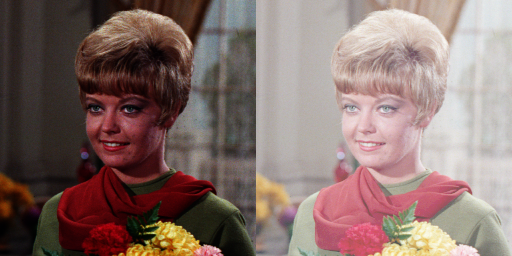

In [3]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/female.tiff')
img_gamma_corr = original.copy()

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      img_gamma_corr[y, x, c] = 255 * ((original[y, x, c] / 255) ** (1 / gamma))

final_frame = cv.hconcat((original, img_gamma_corr))
cv2_imshow(final_frame)

# Tugas 2: Simulasi Image Depth

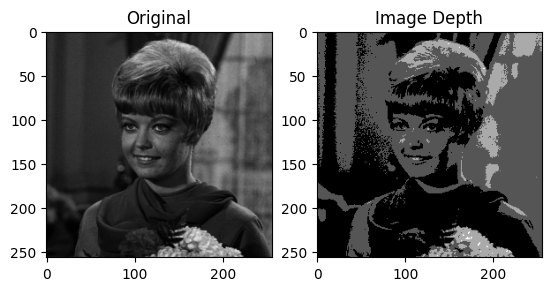

In [4]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)

original = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y, x] = np.round((original[y, x] / level)) * level

original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
depth_image = cv.cvtColor(depth_image, cv.COLOR_BGR2RGB)

# Gambar pertama
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, posisi 1
plt.imshow(original)
plt.title('Original')

# Gambar kedua
plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, posisi 2
plt.imshow(depth_image)
plt.title('Image Depth')

# Menampilkan gambar
plt.show()

# Tugas 3: Average Denoising

In [5]:
import glob
from math import sqrt, log10

In [6]:
def load_dataset(img_dir):
    img_list = []

    for file in glob.glob(img_dir):
      img = cv.imread(file)
      img_list.append(img)

    return img_list

In [7]:
dir = '/content/drive/MyDrive/Colab Notebooks/PCVK/Images/noises/*.jpg'

In [8]:
noise_images = load_dataset(dir)
no_noise_image = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/galaxy.jpg')

In [9]:
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if (mse == 0):
    return 100

  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

In [47]:
def image_averagin(images):
  new_image = np.zeros(images[0].shape)
  for i in range(len(images)):
    new_image += images[i]

  new_image /= len(images)

  return new_image

In [52]:
def average_PSNR(original, image_list):
  avg_image = image_averagin(image_list)

  psnr = PSNR(original, avg_image)

  return psnr, avg_image

Nilai PSNR: 19.40789385109343


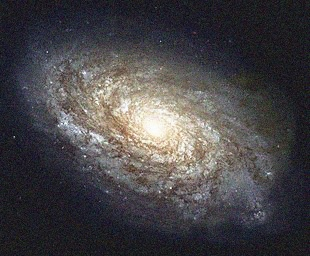

In [53]:
avg_5, avg_image = average_PSNR(no_noise_image, noise_images[:5])
print(f'Nilai PSNR: {avg_5}')
cv2_imshow(avg_image)

19.592614152632827


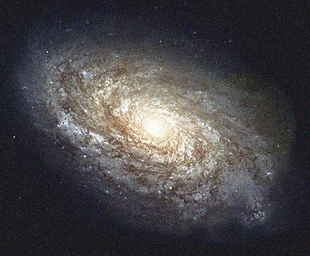

In [55]:
avg_10, avg_image = average_PSNR(no_noise_image, noise_images[:10])
print(avg_10)
cv2_imshow(avg_image)

19.6890635221209


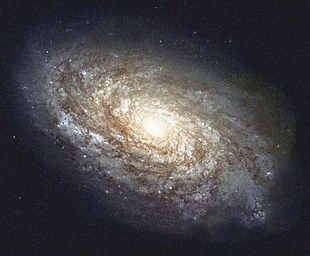

In [56]:
avg_20, avg_image = average_PSNR(no_noise_image, noise_images[:20])
print(avg_20)
cv2_imshow(avg_image)

19.731356424664746


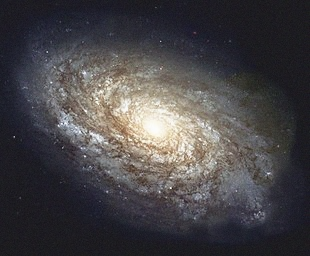

In [57]:
avg_40, avg_image = average_PSNR(no_noise_image, noise_images[:40])
print(avg_40)
cv2_imshow(avg_image)

19.753933806215322


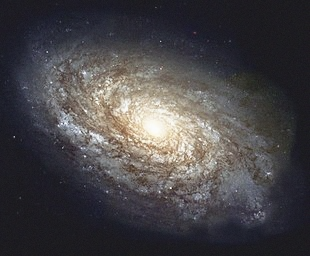

In [58]:
avg_80, avg_image = average_PSNR(no_noise_image, noise_images[:80])
print(avg_80)
cv2_imshow(avg_image)

19.758317288501708


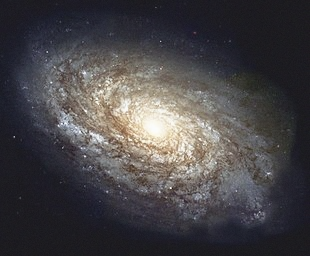

In [59]:
avg_100, avg_image = average_PSNR(no_noise_image, noise_images[:100])
print(avg_100)
cv2_imshow(avg_image)

# Tugas 4: Image Masking

In [18]:
def mask_black_color(ktp_mask):
  invers_ktp_mask = cv.bitwise_not(ktp_mask)

  white_background = np.ones_like(original_ktp) * 255

  mask_black_clr = cv.bitwise_and(white_background, white_background, mask=invers_ktp_mask)

  return mask_black_clr

In [19]:
def show_plot(original, ktp_mask, masked):
  ktp_mask = cv.cvtColor(ktp_mask, cv.COLOR_BGR2RGB)

  plt.figure(figsize=(12, 6))
  plt.subplot(1, 3, 1)
  plt.axis("off")
  plt.imshow(original_ktp)
  plt.title("Original")

  plt.subplot(1, 3, 2)
  plt.axis("off")
  plt.imshow(ktp_mask)
  plt.title("")

  plt.subplot(1, 3, 3)
  plt.axis("off")
  plt.imshow(masked)
  plt.title("Masked")

  plt.show()

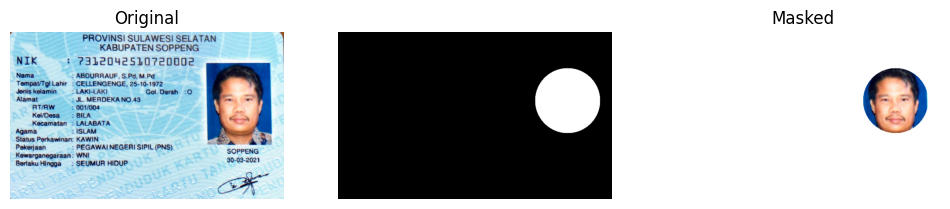

In [20]:
original_ktp = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg')
original_ktp = cv.cvtColor(original_ktp, cv.COLOR_BGR2RGB)

ktp_mask = np.zeros(original_ktp.shape[:2], original_ktp.dtype)
cv.circle(ktp_mask, (670, 200), 95, [255, 255, 255], -1)

masked = cv.bitwise_and(original_ktp, original_ktp, mask=ktp_mask)

mask_black_clr = mask_black_color(ktp_mask)

final_mask = cv.add(masked, mask_black_clr)

show_plot(original_ktp, ktp_mask, final_mask)

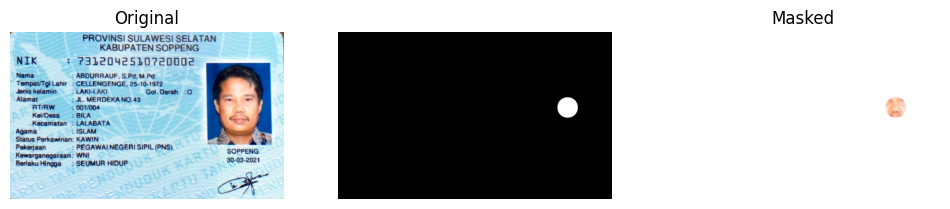

In [21]:
ktp_mask = np.zeros(original_ktp.shape[:2], original_ktp.dtype)
cv.circle(ktp_mask, (670, 220), 30, [255, 255, 255], -1)

masked = cv.bitwise_and(original_ktp, original_ktp, mask=ktp_mask)

mask_black_clr = mask_black_color(ktp_mask)

final_mask = cv.add(masked, mask_black_clr)

show_plot(original_ktp, ktp_mask, final_mask)

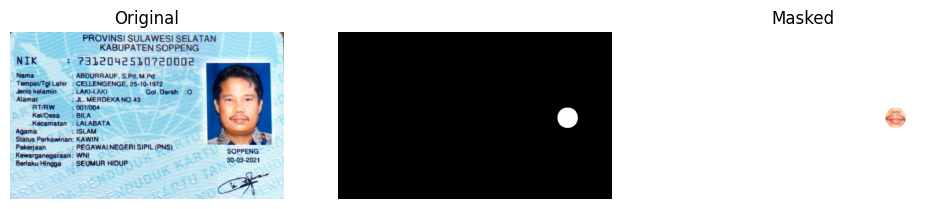

In [22]:
ktp_mask = np.zeros(original_ktp.shape[:2], original_ktp.dtype)
cv.circle(ktp_mask, (670, 250), 30, [255, 255, 255], -1)

masked = cv.bitwise_and(original_ktp, original_ktp, mask=ktp_mask)

mask_black_clr = mask_black_color(ktp_mask)

final_mask = cv.add(masked, mask_black_clr)

show_plot(original_ktp, ktp_mask, final_mask)

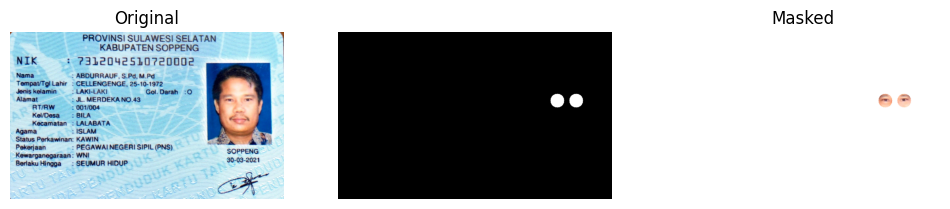

In [23]:
ktp_mask = np.zeros(original_ktp.shape[:2], original_ktp.dtype)
cv.circle(ktp_mask, (640, 200), 20, [255, 255, 255], -1)
cv.circle(ktp_mask, (695, 200), 20, [255, 255, 255], -1)

masked = cv.bitwise_and(original_ktp, original_ktp, mask=ktp_mask)

mask_black_clr = mask_black_color(ktp_mask)

final_mask = cv.add(masked, mask_black_clr)

show_plot(original_ktp, ktp_mask, final_mask)

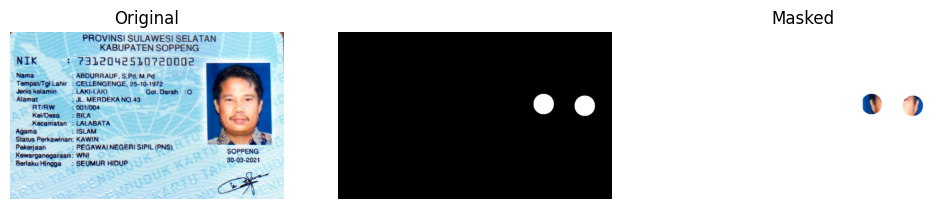

In [24]:
ktp_mask = np.zeros(original_ktp.shape[:2], original_ktp.dtype)
cv.circle(ktp_mask, (600, 210), 30, [255, 255, 255], -1)
cv.circle(ktp_mask, (720, 215), 30, [255, 255, 255], -1)

masked = cv.bitwise_and(original_ktp, original_ktp, mask=ktp_mask)

mask_black_clr = mask_black_color(ktp_mask)

final_mask = cv.add(masked, mask_black_clr)

show_plot(original_ktp, ktp_mask, final_mask)

# Tugas 5: Lakukan percobaan menggunakan operator lain

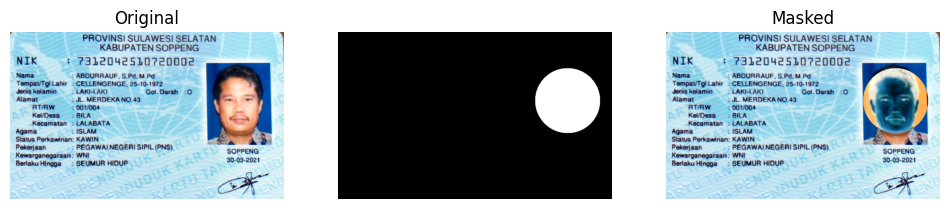

In [25]:
input = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/Images/KTP_More/KTP_More/KTP7.jpeg')
input = cv.cvtColor(input, cv.COLOR_BGR2RGB)

ktp_mask = np.zeros(input.shape[:2], input.dtype)
cv.circle(ktp_mask, (670, 200), 95, [255, 255, 255], -1)

masked_not = cv.bitwise_not(input.copy(), input.copy(), mask=ktp_mask)

show_plot(input, ktp_mask, masked_not)

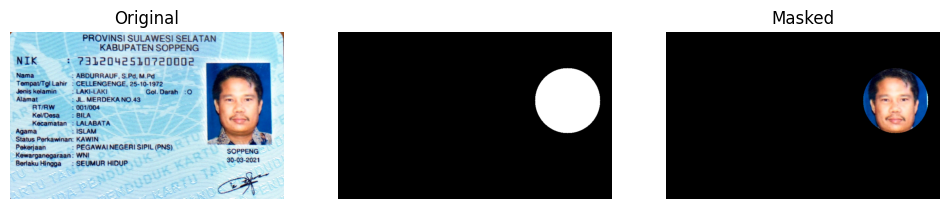

In [26]:
ktp_mask = np.zeros(input.shape[:2], input.dtype)
cv.circle(ktp_mask, (670, 200), 95, [255, 255, 255], -1)

masked_or = cv.bitwise_or(input.copy(), input.copy(), mask=ktp_mask)

show_plot(input, ktp_mask, masked_or)

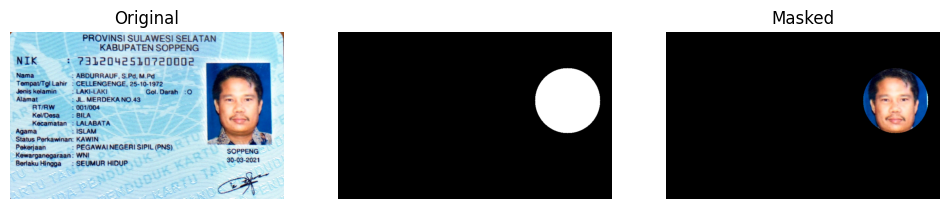

In [27]:
ktp_mask = np.zeros(input.shape[:2], original_ktp.dtype)
cv.circle(ktp_mask, (670, 200), 95, [255, 255, 255], -1)

masked_and = cv.bitwise_and(input.copy(), input.copy(), mask=ktp_mask)

show_plot(input, ktp_mask, masked_and)

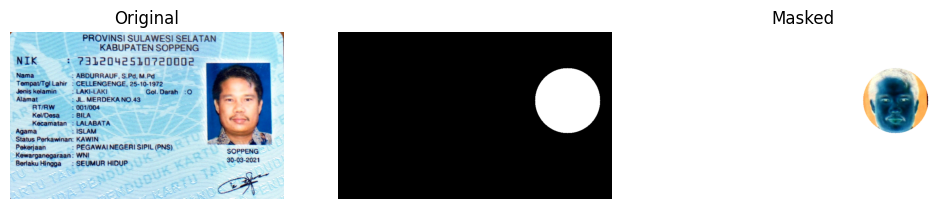

In [28]:
ktp_mask = np.zeros(input.shape[:2], original_ktp.dtype)
cv.circle(ktp_mask, (670, 200), 95, [255, 255, 255], -1)

masked_and = cv.bitwise_and(input.copy(), input.copy(), mask=ktp_mask)
masked_nand = cv.bitwise_not(masked_and)

show_plot(input, ktp_mask, masked_nand)

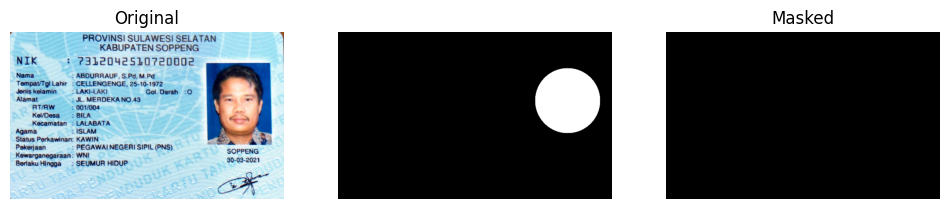

In [29]:
ktp_mask = np.zeros(input.shape[:2], original_ktp.dtype)
cv.circle(ktp_mask, (670, 200), 95, [255, 255, 255], -1)

masked_xor = cv.bitwise_xor(input.copy(), input.copy(), mask=ktp_mask)

show_plot(input, ktp_mask, masked_xor)